In [1]:
#This part is to import the liabraries which are required to write the code
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
#Here we are importing the csv file in data frame to work further
names = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
# data = pd.read_csv("/Users/koustavagoswami/Documents/Final_dataSet.csv",header=None, names=names)
data = pd.read_csv("train.csv")

WE CAN SEE THAT THERE ARE MANY ATTRIBUTES IN THE DATASET WHICH ARE MAY BE NOT REQUIRED TO MAKE THE MODEL AND TO MAKE THE FUTURE PREDICTION FOR THE UNSEEN DATASET. SO, I DECIDED TO FIRST GO INTO DEEP IN THE DATASET BASED ON IT'S ATTRIBUTE. I HAVE PICKED SOME ATTRIBUTES AND THEN I HAVE DRAWN SOME GRAPH BASED ON IT. I HAVE CHECKED BELOW POINTS:-
1. HOW MUCH THE ATTRIBUTE IS CONTRIBUTING TO THE DATASET TO MAKE THE DECISION ABOUT THE SURVIVED PEOPLE AND DEAD PEOPLE
2. WHAT ARE THE IMPACTS OF THESE ATTRIBUTES AND HOW IT IS GOING TO MAKE IMPACT IN FUTURE FOR THE UNSEEN DATASETS.
BASED IN THESE TWO ABOVE POINTS, I HAVE PICKED SOME ATTRIBUTES AND COMPARED THEM WITH GRAPHICAL ANALYSIS WHETHER IT IS VERY IMPORTANT TO KEEP THE ATTRIBUTE OR IT SHOULD BE DELETED.

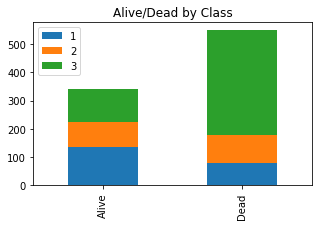

In [10]:
#This part I have written to make the graphs for the Survived and Dead pople count based on the Pclass attribute
%matplotlib inline 

#-------------------Survived/Died by Class -------------------------------------
alive = data[data['Survived']==1]['Pclass'].value_counts()
dead = data[data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([alive,dead])
df.index = ['Alive','Dead']
df.plot(kind='bar',stacked=True, figsize=(5,3), title="Alive/Dead by Class")

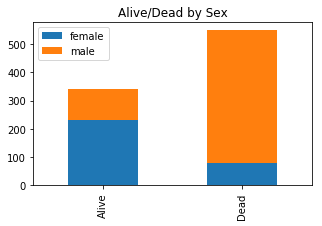

In [13]:
#This code I have written to take the Survived and Dead poeple count based on the Sex of the People.
Alive = data[data.Survived == 1]['Sex'].value_counts()
Dead = data[data.Survived == 0]['Sex'].value_counts()
df = pd.DataFrame([Alive , Dead])
df.index = ['Alive','Dead']
df.plot(kind='bar',stacked=True, figsize=(5,3), title="Alive/Dead by Sex")

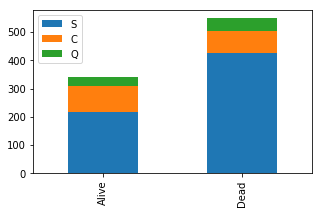

In [40]:
#This code I have written to check the number of Survived and Dead people based on the Embarked attribute
Alive = data[data['Survived']==1]['Embarked'].value_counts()
Dead = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([Alive,Dead])
df.index = ['Alive','Dead']
df.plot(kind='bar',stacked=True, figsize=(5,3))


AFTER ANALYZING THE ABOVE ATTRIUTES I HAVE COME TO THE CONCLUSION THAT THE ABOVE ATTRIBUTES ARE MAKING IMPACT ON THE PREDICTION OF WHETHER INDIVIDUAL HAS SURVIVED OR NOT. SO, I HAVE KEPT THE ABOVE ATTRIBUTES AND DISCARDED THE OTHER ATTRIBUTES.
I HAVE ALSO SEEN THAT THERE ARE SOME DATASETS WHERE NULL VALUES ARE THERE. SO, THE PREFIX HAS BEEN TAKEN INTO ACCOUNT TO GROUP THE SAME TYPES OF PEOPLE AND THE MEAN OF THEIR AGES HAVE BEEN TAKEN TO REPLACE THE NULL AGES.
TO DO THAT BELOW I HAVE WRITTEN A CODE WHERE THE PREFIX COLUMN HAS BEEN MADE.

In [57]:
#Here I have written some function which will be called later on to process the dataset. The functions are responsible
#discard the extra features, introduce new column named prefix, do the Encoding of the sex column, do the encoding of
#the Embarked column
def finalFeatures(x):
    xx = x.drop(['Cabin','Ticket','Fare', 'Parch', 'SibSp'],axis=1)
    return xx

def prefix(df):
      df['Prefix'] = df.Name.apply(lambda x: x.split(' ')[1])  
      return df

def sexEncoding(x):
    labelEncoder = LabelEncoder()
    x.Sex=labelEncoder.fit_transform(x.Sex)
    return x

def embarkedEncoding(x):
    for i in x.Embarked:
        if(i == "S"):
            x.Embarked.replace(to_replace=[i],value=0,inplace=True)
        elif(i == "C"):
            x.Embarked.replace(to_replace=[i],value=1,inplace=True)
        else:
            x.Embarked.replace(to_replace=[i],value=2,inplace=True)
    return x

In [178]:
#Here I am preprocessing the data with the above functions
X = finalFeatures(data)
X = prefix(X)
X = sexEncoding(X)
X = embarkedEncoding(X)

In [183]:
#Here I am picking out the Ages which are in the same group of Prefixes and taken the mean of the same age group
a = X.groupby('Prefix').mean()['Age']
a = a.to_frame().reset_index()

In [185]:
#Here I have pointed out the dataset which has null value in the age and made a seperate dataframe with the data
X_Null = X[X.Age.isnull()]

In [186]:
#This function is to get the age corresponds to the prefix which i null from the above built new dataframe
def getAge(j):
    for k in range(len(a)):
        if(a.Prefix.iloc[k] == j):
            return a.Age.iloc[k]

In [187]:
#Here I am replacing the null ages with the mean ages from the above dataframe.
for i in X_Null.Prefix:
    ss = getAge(i)
    X_Null.at[X_Null[X_Null['Prefix']==i].index,'Age'] = ss

In [188]:
#Here I am repalcing the null values with the mean values in the actual dataframe
X.loc[(X.Prefix.isin(X_Null.Prefix)) & (X.Age.isnull()), ['Age']] = X_Null.loc[(X_Null.Prefix.isin(X.Prefix))& (X.Age.isnull()),['Age']].values
X

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,0.0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1.0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0.0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,0.0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0.0,Mr.
5,6,0,3,"Moran, Mr. James",1,32.389610,2.0,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0.0,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,0.0,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0.0,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1.0,Mrs.


In [189]:
X[X.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Prefix
868,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0.0,"Melkebeke,"


In [190]:
X[X.Age.isnull()].Age = 0

In [191]:
X[X.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Prefix
868,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0.0,"Melkebeke,"


In [192]:
X.loc[X.Age.isnull(),['Age']] = 0

In [193]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,0.0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1.0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0.0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,0.0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0.0,Mr.
5,6,0,3,"Moran, Mr. James",1,32.389610,2.0,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0.0,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,0.0,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0.0,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1.0,Mrs.


In [196]:
#To make the dataset ready for the model building I have made the input attributes and class ready by dropping
#unwanted attributes.
X = X.drop(['PassengerId','Survived','Prefix','Name'],axis=1)
y = data['Survived'] #To make the class

KeyError: "['PassengerId' 'Survived' 'Prefix' 'Name'] not found in axis"

In [199]:
#Here I have taken the help of scikit learn to split the datasets into train and test data which will be used to train
#the model and to test the models accuracy
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.34,random_state=43)

In [241]:
#I have used the k-nearest neighbour algorithm where I have taken the help of scikit learn.
#The nearest neighbours number I have chosen is 3 to get the model built and ready for the predictions.
#I have taken the help of scikit learn score liabrary where it has calculated the score based on how the model is
#predicting when the unseen data has been seen
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7755775577557755

NOW I HAVE DECIDED TO CHECK THE MODEL WITH THE TEST DATA PROVIDED AND TO DO SO I HAVE WRITTEN THE BELOW CODE WHICH IS EXACTLY IN THE SAME FRAME WITH THE TRAINING DATA.

In [206]:
#This code is to take the dataset into dataframe
data_test = pd.read_csv("test.csv")

In [208]:
#This part is to preprocess the data
testData = finalFeatures(data_test)
testData = prefix(testData)
testData = sexEncoding(testData)
testData = embarkedEncoding(testData)

In [210]:
#Grouping the Same Prefix age dataset and taking the mean of the ages of the same group
ageGroup = testData.groupby('Prefix').mean()['Age']
ageGroup = ageGroup.to_frame().reset_index()

In [225]:
#New dataframe to check the ages which are null
ageGroup_Null = testData[testData.Age.isnull()]

In [226]:
#Function to get the mean age of the same prefix group
def gettestAge(j):
    for k in range(len(ageGroup)):
        if(ageGroup.Prefix.iloc[k] == j):
            return ageGroup.Age.iloc[k]

In [227]:
#This is the part where I have mapped the null value ages with the mean ages where prefixes are matching 
for i in ageGroup_Null.Prefix:
    ss = gettestAge(i)
    ageGroup_Null.at[ageGroup_Null[ageGroup_Null['Prefix']==i].index,'Age'] = ss

In [230]:
#The main test dataset null age values are replaced with the mean ages
testData.loc[(testData.Prefix.isin(ageGroup_Null.Prefix)) & (testData.Age.isnull()), ['Age']] = ageGroup_Null.loc[(ageGroup_Null.Prefix.isin(testData.Prefix))& (testData.Age.isnull()),['Age']].values
testData

,PassengerId,Pclass,Name,Sex,Age,Embarked,Prefix
0,892,3,"Kelly, Mr. James",1,34.500000,2,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,0,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,2,Mr.
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,0,Mrs.
5,897,3,"Svensson, Mr. Johan Cervin",1,14.000000,0,Mr.
6,898,3,"Connolly, Miss. Kate",0,30.000000,2,Miss.
7,899,2,"Caldwell, Mr. Albert Francis",1,26.000000,0,Mr.
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.000000,1,Mrs.
9,901,3,"Davies, Mr. John Samuel",1,21.000000,0,Mr.


In [231]:
#The ages which are null and do not have any value have been set as 0
testData.loc[testData.Age.isnull(),['Age']] = 0

In [232]:
#Dropping the attributes which are of no use to keep same as model structure for prediction
testData_X = testData.drop(['PassengerId','Prefix','Name'],axis=1)

In [233]:
#Here I am passing the test data into model to do the prediction of the unseen dataset
output = knn.predict(testData_X)

In [235]:
#Here I am preparing the dataset for the final submission keeping the survival output and the passengerId
write_to_csv = pd.DataFrame({ 'PassengerId' : testData['PassengerId'], 'Survived': output })

In [236]:
#Writing the data to csv file for final submission
write_to_csv.to_csv('TitanicPrediction.csv', index = False)